In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


df = pd.read_csv('train.csv')

In [2]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

# Data Cleaning

In [3]:
# isi pakai median
df['Age'].fillna(df['Age'].median(), inplace=True)

# isi pakai most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# hapus 'Cabin' column karena terlalu banyak missing value (apakah boleh? gakepake jg si)
df.drop(columns=['Cabin'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_1896\3351801082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_1896\3351801082.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [4]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Dimentionality Reduction

In [5]:
# hapus/drop data yang tidak terpakai/relevan
# yang terpakai -> age, sex, pclass

df = df.drop(columns=['PassengerId', 'Name'])
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
None
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


# Label Encoding
Label Encoding -> mengubah data kategori (teks) jadi angka supaya bisa diproses oleh model machine learning.

Disini 'Sex' = "male" & "female" jadi 1 & 0

In [6]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None
          Survived      Pclass         Sex         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.383838    2.308642    0.647587   29.3

# Normalize

Normalisasi -> mengubah skala nilai numerik agar berada dalam rentang tertentu, biasanya antara 0 dan 1. Agar fitur yang memiliki rentang nilai yang besar (misalnya 'Fare' yang bisa sangat tinggi) tidak mendominasi fitur lain saat digunakan dalam model machine learning.


In [7]:
# Normalize age (karena fare tidak ditanya)
scaler = MinMaxScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])
print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None
          Survived      Pclass         Sex         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.383838    2.308642    0.647587    0.3

# Plotting

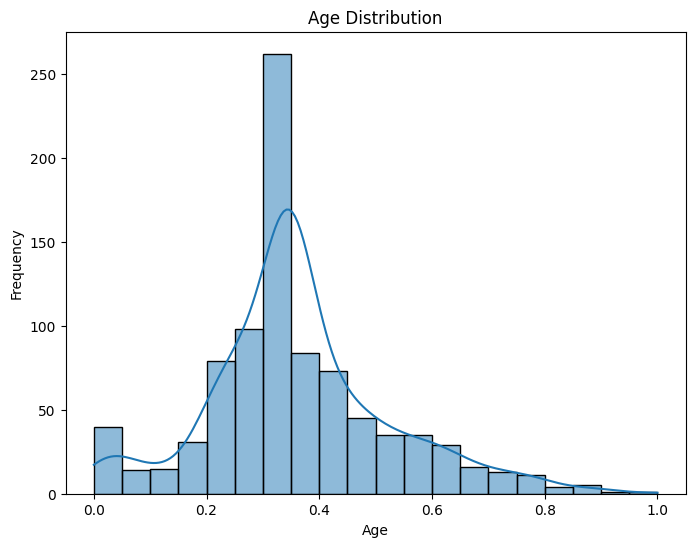

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1896\3866001372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sex'], palette="pastel")


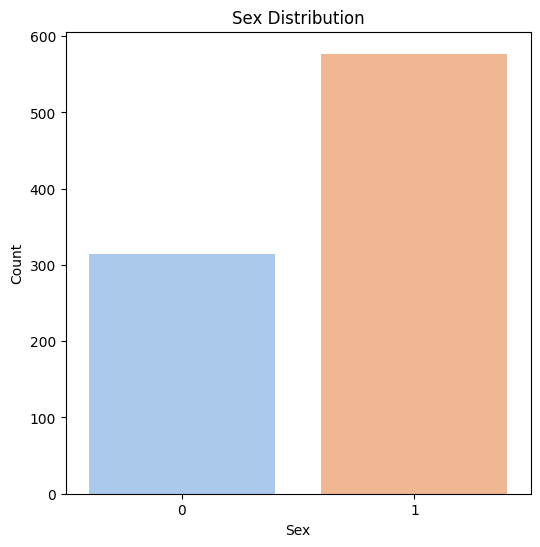

In [9]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['Sex'], palette="pastel")
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1896\1513814755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Pclass'], palette="muted")


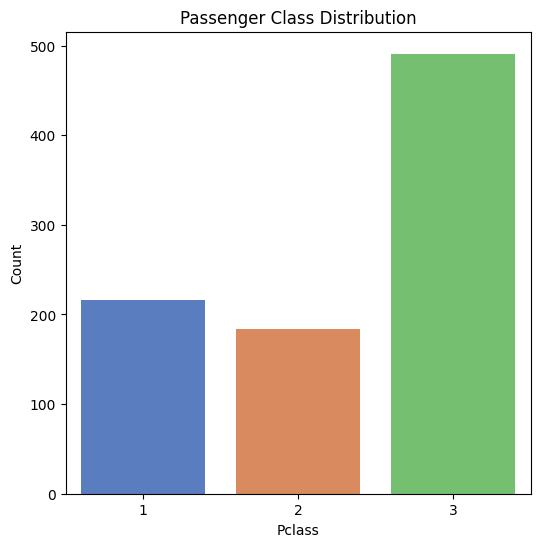

In [10]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['Pclass'], palette="muted")
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


# Survival Rates by Each Category

C:\Users\USER\AppData\Local\Temp\ipykernel_1896\1144483660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Pclass'], y=df['Survived'], palette="muted")


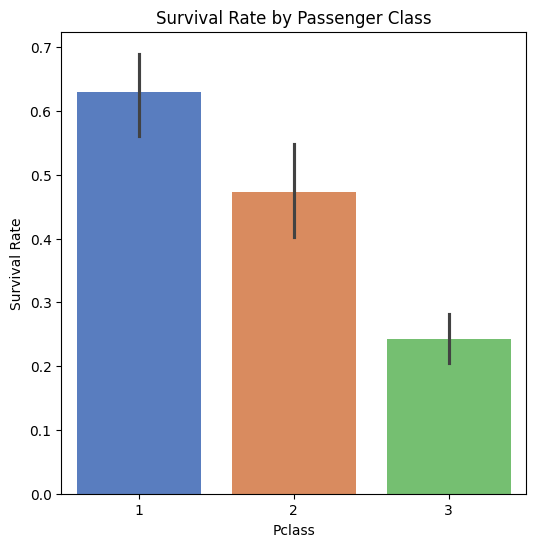

In [11]:
# by pclass
plt.figure(figsize=(6, 6))
sns.barplot(x=df['Pclass'], y=df['Survived'], palette="muted")
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_1896\3623609943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Sex'], y=df['Survived'], palette="pastel")


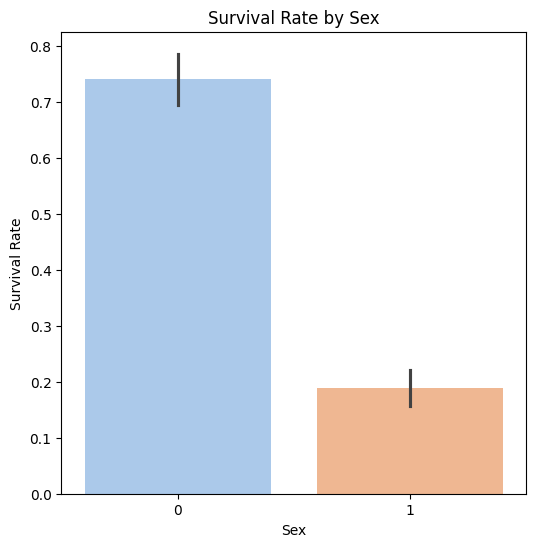

In [12]:
# by sex
plt.figure(figsize=(6, 6))
sns.barplot(x=df['Sex'], y=df['Survived'], palette="pastel")
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

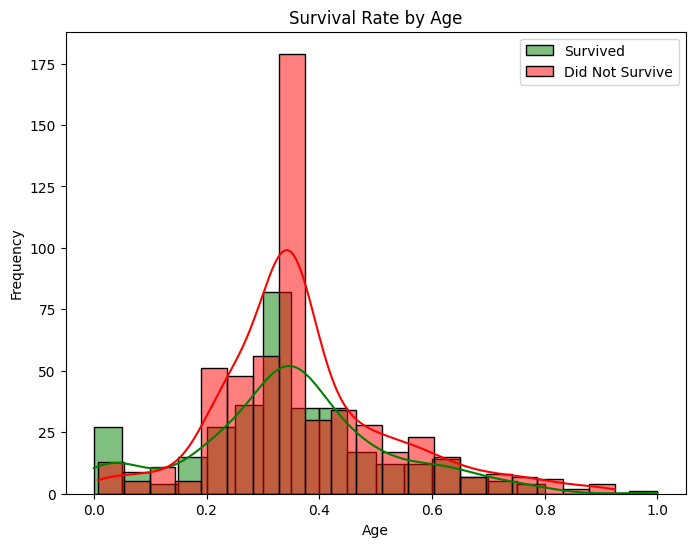

In [13]:
# by age
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=20, kde=True, color="green", label="Survived")
sns.histplot(df[df['Survived'] == 0]['Age'], bins=20, kde=True, color="red", label="Did Not Survive")
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Insights

## 1. Survival Rates by Class
Di diagram menunjukan bahwa passenger kelas 1 lebih banyak yang survive ketimbang passenger kelas 2, apalagi 3. Dan karena tingkat class berhubungan dengan jumlah tarif (fare), secara tidak langsung mengartikan bahwa faktor ekonomi mempengaruhi survivability soerang passenger.

## 2. Survival Rates by Age
Diagram menunjukan bahwa passenger female lebih banyak yang selamat dibanding passenger male. Dugaan saya hal ini terjadi karena ketika proses evakuasi, diberlakukan "women and children first"

## 3. Survival Rates by Age
Sama dengan diagram sebelumnya, passenger middle age lebih banyak yang tidak selamat karena mungkin children & ederly diutamakan dalam proses evakuasi.

# References

Ali, M. (2024, July). EDA and data preprocessing. Genially. URL: https://view.genially.com/668e4048c623c200148ba79f/dossier-reporting-eda-and-data-preprocessing